In [98]:
!pip install gensim

In [104]:
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=a8a3dc5131890fa828254511d1bc29f8597ebcad2f9587e43a26bb2d00164b99
  Stored in directory: c:\users\user9\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=a691297f36e57badc12d393aa84d7e12cff450b54e792d4a96cb2af04397c2f9
  Stored in directory: c:\users\user9\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb7

In [1]:
import pandas as pd
pd.__version__

import warnings

import re

from konlpy.tag import Okt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

warnings.filterwarnings(action='ignore')

In [99]:
import gensim
import gensim.corpora as corpora

In [108]:
import os
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [2]:
nsmc_train_df = pd.read_csv('C:/kyj/python/BigDataAnalysis/data/ratings_train.txt',
                           encoding='utf-8', sep='\t', engine='python')
nsmc_train_df.head()
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [3]:
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [4]:
nsmc_train_df['document'] = nsmc_train_df['document'].apply(
    lambda x: re.sub(r'[^ㄱ-ㅣ가-힣]+',' ',x))
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [34]:
nsmc_test_df = pd.read_csv('C:/kyj/python/BigDataAnalysis/data/ratings_test.txt',
                           encoding='utf-8', sep='\t', engine='python')
nsmc_test_df.head()
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [37]:
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]
nsmc_test_df['label'].value_counts()
nsmc_test_df['document'] = nsmc_test_df['document'].apply(lambda x: 
                                              re.sub(r'[^ㄱ-ㅣ가-힣]+',' ',x))
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [7]:
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [8]:
tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range=(1,2), 
                        min_df=3, max_df=0.9)
tfidf.fit(nsmc_train_df['document'])
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])

In [9]:
SA_lr = LogisticRegression(random_state=0)
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [10]:
params = {'C':[1,3,3.5,4,4.5,5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, 
                             scoring='accuracy', verbose=1)
SA_lr_grid_cv.fit(nsmc_train_tfidf, nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [11]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_,4))

{'C': 3} 0.8553


In [12]:
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [40]:
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [41]:
print('감성분석 정확도: ', round(accuracy_score(nsmc_test_df['label'], test_predict),3))

감성분석 정확도:  0.858


In [52]:
st = input('감성분석 문장 입력: ')

감성분석 문장 입력: 웃자 ^o^ 오늘은 좋은 날이 될 것 같은 예감100%! ^^*


In [56]:
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['웃자', '오늘은', '좋은', '날이', '될', '것', '같은', '예감']
['웃자 오늘은 좋은 날이 될 것 같은 예감']


In [57]:
st_tfidf = tfidf.transform(st)
st_predict = SA_lr_best.predict(st_tfidf)

In [59]:
if(st_predict == 0):
    print(st, "->> 부정감성")
else:
    print(st, "->> 긍정감성")

['웃자 오늘은 좋은 날이 될 것 같은 예감'] ->> 긍정감성


In [60]:
import json
file_name = '코로나_naver_news'
with open('C:/kyj/python/BigDataAnalysis/data/'+file_name+'.json',
         encoding='utf8') as j_f:
    data = json.load(j_f)

print(data)

[{'cnt': 1, 'description': '<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ', 'pDate': '2020-06-04 14:12:00', 'title': "결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;"}, {'cnt': 2, 'description': '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ', 'pDate': '2020-06-04 14:12:00', 'title': '창녕군, ‘창녕형’비대면 선별진료소 운영'}, {'cnt': 3, 'description': "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ", 'pDate': '2020-06-04 14:12:00', 'title': "DK모바일, 메인 홍보 모델로 AOA '설현' 선정"}, {'cnt': 4, 'description': '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ', 'pDate': '2020-06-04 14:12:00', 'title': '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]'}, {'cnt': 5, 

In [61]:
data_title = []
data_description = []

for item in data:
    data_title.append(item['title'])
    data_description.append(item['description'])    

In [62]:
data_title
data_description

['<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ',
 '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ',
 "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ",
 '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ',
 '\xa0이재갑\xa0고용노동부\xa0장관은\xa06월3일(수)\xa011시에\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0서울\xa01센터(서울\xa0중구)를\xa0방문했다. 이번\xa0현장\xa0방문은\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0신청을\xa0시작한\xa0지\xa0이틀\xa0만에\xa0약\xa012만건... ',
 "하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로 오프라인 행사를 진행하지 않게 되었고, 공식 채널(Canal +)을 통해 ‘Cannes Official Selection 2020’ 명칭의 초청작 리스트를 공개했다. 한편 '반도'는 7월 국내외... ",
 '경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩 국가보안법

In [63]:
data_df = pd.DataFrame({'title':data_title, 'description':data_description})

In [64]:
data_title_tfidf = tfidf.transform(data_df['title'])
data_title_predict = SA_lr_best.predict(data_title_tfidf)
data_df['title_label'] = data_title_predict

In [65]:
data_description_tfidf = tfidf.transform(data_df['description'])
data_description_predict = SA_lr_best.predict(data_description_tfidf)
data_df['description_label'] = data_description_predict

In [114]:
data_df.to_csv('C:/kyj/python/BigDataAnalysis/data/'+file_name +'.csv', encoding='utf-8')

In [81]:
columns_name = ['title','title_label','description','description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i,data in data_df.iterrows():
    title = data['title']
    description = data['description']
    t_label = data['title_label']
    d_label = data['description_label']
    
    if d_label == 0:
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title,t_label,description,d_label]], 
                                                      columns=columns_name), ignore_index=True)
    else:
        POS_data_df = POS_data_df.append(pd.DataFrame([[title,t_label,description,d_label]], 
  
                                                      columns=columns_name), ignore_index=True)
print(len(NEG_data_df),len(POS_data_df))

424 376


In [112]:
NEG_data_df.to_csv('C:/kyj/python/BigDataAnalysis/data/'+file_name +'_NEG.csv', encoding='utf-8')
POS_data_df.to_csv('C:/kyj/python/BigDataAnalysis/data/'+file_name +'_POS.csv', encoding='utf-8')

In [82]:
POS_description = POS_data_df['description']
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d))
print(POS_description_noun_tk)    

[['변화', '핵심', '중', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '의', '위기', '마주', '언제', '끝', '날', '또', '앞', '미래', '국가', '국민', '어려움', '해결', '저희'], ['한편', '코로나', '로', '해외', '식', '재료', '사재기', '국민', '먹거리', '안정', '생산', '것', '포스트', '코로나', '의', '과제', '부각', '농민', '기본소득', '도입', '통해', '안정', '생산', '기반', '확충', '것'], ['최근', '갤러리', '현대', '창업', '주년', '기념', '전', '이', '작품', '전시', '코로나', '의', '영향', '마스크', '착용', '관람객', '미술', '트렌드', '한국', '미술', '시장', '글', '정태희', '서울', '옥션', '스페셜리스트', '세계', '경기', '침체', '코로나', '여파'], ['코로나', '감안', '차', '면접', '비대', '역량', '검사', '도입', '국내', '최대', '치킨', '프랜차이즈', '제너시스', '비비큐', '회장', '채용', '관계자', '한국', '대표', '책임감', '브랜드', '로서', '코로나', '로', '침체', '채용', '분위기'], ['오후', '서울', '중랑구', '의료', '의료', '잠시', '콘서트', '신종', '코로나', '바이러스', '감염증', '코로나', '환자', '진료', '위해', '수고', '온', '의료', '진', '가수', '폴', '킴', '공연', '보고', '뉴스'], ['플립', '러닝', '온라인', '학습', '후', '교실', '토론', '및', '심화', '학습', '거꾸로', '교실', '불리', '포스트', '코로나', '시대', '교육', '방식', '주목', '아르고', '리더십', '편', '상황', '게임', '통해', '리더십', '유형'], [

In [83]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w)>1]
    POS_description_noun_join.append(" ".join(d2))
print(POS_description_noun_join)    

['변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 마주 언제 미래 국가 국민 어려움 해결 저희', '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 과제 부각 농민 기본소득 도입 통해 안정 생산 기반 확충', '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜리스트 세계 경기 침체 코로나 여파', '코로나 감안 면접 비대 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너시스 비비큐 회장 채용 관계자 한국 대표 책임감 브랜드 로서 코로나 침체 채용 분위기', '오후 서울 중랑구 의료 의료 잠시 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 위해 수고 의료 가수 공연 보고 뉴스', '플립 러닝 온라인 학습 교실 토론 심화 학습 거꾸로 교실 불리 포스트 코로나 시대 교육 방식 주목 아르고 리더십 상황 게임 통해 리더십 유형', '도배 장판 침대 장롱 가구 교체 코로나 예방 방역 진행 주거 환경 조성 미자 양동 동장 이웃 위해 봉사', '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 서로 금방 이서 정말 서로 호흡', '청와대 해외 보가 문재인 대통령 포스트 코로나 시대 경제위기 정상회담 통해 양국 협력 에너지 의료 확장 최근 카타르 코로나 관련', '맥도날드 코로나 방역 작업 대구 지하철 청소 근로자 빅맥 커피 증정 패션 업계 나눔 활동 동참 코오롱 인더스 트리 직원 성과 상금 코로나 어려움', '정하영 김포시 혁신 교육 지구 사업 특수교육 대상자 사업 별도 편성 소외 학생 면서 코로나 교육과정 운영 판단 학생 안전 방역', '군포 시청 서울시 리치 웨이 코로나 진자 동선 공개 군포로 번길 거주 자료 군포 시청 군포 시청 서울시 리치 웨이 코로나 진자 동선 공개 군포 시청 공식 블로그 통해 서울시', '명품 함양 양파 특판전 모습 사진 제공 함양군 함양군 롯데 마트 서울 역점 양파 소비 촉진 판촉 행사 코로나 농심 위로 함양군 코로

In [84]:
NEG_description = NEG_data_df['description']
NEG_description_noun_tk = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d))
print(NEG_description_noun_tk)    

NEG_description_noun_join = []

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w)>1]
    NEG_description_noun_join.append(" ".join(d2))
print(NEG_description_noun_join) 

[['코로나', '발', '경제', '위기', '대응', '위해', '돈', '곳', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '이', '때문', '한국', '개발', '등', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '앞', '설치', '선', '진료', '소', '검사', '체온', '측정', '사진', '제공', '창녕군', '청', '코로나', '장기', '대비', '비대', '선', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '선', '진료', '소'], ['한편', '설현', '은', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '의', '새', '드라마', '낮', '밤', '출연', '검토', '게임', '이벤트', '대한'], ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀', '약'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '작', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '명', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '때', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국', '컨테이너', '처리', '량', '국내', '항만', '신종', '코로나', '바이러스', '감염증', '코로나', '사태', '본격', '물동량', '부진', '그', '와중', '인천', '항', '중국', '항만', '정상화'], ['이용', '빈',

In [85]:
POS_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

POS_vocab = dict()
for idx,word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_word = sorted(POS_vocab.items(),key=lambda x: x[1], reverse=True)

In [86]:
POS_word

[('코로나', 30.077425384393997),
 ('의료', 13.730856265320103),
 ('위해', 11.465875721279344),
 ('바이러스', 10.407290205568316),
 ('신종', 9.961781388438851),
 ('감염증', 9.569899334069223),
 ('온라인', 7.967750239490169),
 ('시대', 7.657189669590375),
 ('확산', 7.306983652951232),
 ('이번', 7.227886214453049),
 ('사회', 7.220291094764435),
 ('지역', 6.975940093632284),
 ('통해', 6.80413547451489),
 ('어려움', 6.566891133100553),
 ('기업', 6.199629773408189),
 ('포스트', 6.075669018817756),
 ('극복', 5.969640186663357),
 ('최근', 5.510469228256),
 ('방역', 5.46936100626191),
 ('서울', 5.441065729216821),
 ('환자', 5.370318002770295),
 ('사태', 5.227882457110082),
 ('상황', 5.192562430409998),
 ('경제', 5.187992764411258),
 ('언택트', 5.18490588512069),
 ('대표', 5.113310410010968),
 ('정부', 5.099752398079552),
 ('생활', 5.029325309308453),
 ('한국', 4.988661289991707),
 ('공연', 4.97295980461838),
 ('올해', 4.940582759099085),
 ('우리', 4.932859475173646),
 ('사업', 4.925369715922323),
 ('개발', 4.881469473023533),
 ('대응', 4.86408041682691),
 ('오후', 4.756740

In [87]:
NEG_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

NEG_vocab = dict()
for idx,word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_word = sorted(NEG_vocab.items(),key=lambda x: x[1], reverse=True)

In [88]:
NEG_word

[('코로나', 34.33164055974099),
 ('바이러스', 15.321751669293597),
 ('신종', 13.883873318574295),
 ('감염증', 13.684706908838967),
 ('위해', 11.793650974243455),
 ('확산', 9.695809335612335),
 ('대종상영화제', 9.162254710103765),
 ('사태', 8.681364169839203),
 ('진행', 8.233243592338386),
 ('지역', 7.884816390865208),
 ('방역', 7.677387404057251),
 ('지난', 7.597223689714275),
 ('참석', 7.414779828716485),
 ('진자', 7.074301088728933),
 ('감염', 6.984603544547963),
 ('지원', 6.929332537634364),
 ('이번', 6.767744999819675),
 ('여파', 6.690196937447112),
 ('예방', 6.554954210536716),
 ('경제', 5.584894987390672),
 ('최근', 5.3950588899654015),
 ('생활', 5.103924736007104),
 ('서울', 4.927461435592093),
 ('행사', 4.924865052522257),
 ('장기', 4.872166461656493),
 ('가운데', 4.8036472003804),
 ('어려움', 4.760372854746068),
 ('이후', 4.7517660801144475),
 ('정부', 4.707596549444763),
 ('상황', 4.686098683369752),
 ('시장', 4.643454398253694),
 ('위기', 4.637352060530917),
 ('운영', 4.525318163158156),
 ('로봇', 4.522995279069899),
 ('클라우드', 4.481052213754701),
 ('마

In [89]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location =  'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

max = 15

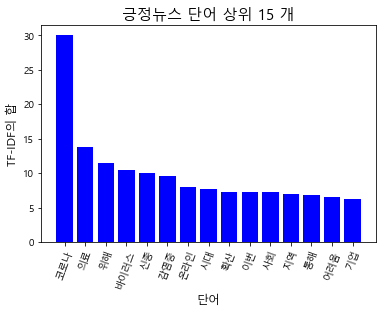

In [94]:
plt.bar(range(max),[i[1] for i in POS_word[:max]], color='blue')
plt.title('긍정뉴스 단어 상위 %d 개'%max, fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('TF-IDF의 합', fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_word[:max]], rotation=70)

plt.show()

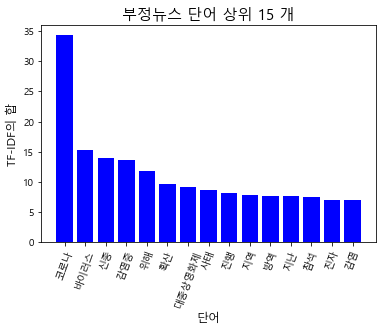

In [95]:
plt.bar(range(max),[i[1] for i in NEG_word[:max]], color='blue')
plt.title('부정뉴스 단어 상위 %d 개'%max, fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('TF-IDF의 합', fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_word[:max]], rotation=70)

plt.show()

In [97]:
description = data_df['description']
description_noun_tk = []
for d in description:
    description_noun_tk.append(okt.nouns(d))
    
description_noun_tk2 = []
for d in description_noun_tk:
    item=[i for i in d if len(i)>1]
    description_noun_tk2.append(item)

print(description_noun_tk2)
    

[['코로나', '경제', '위기', '대응', '위해', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '때문', '한국', '개발', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '설치', '진료', '검사', '체온', '측정', '사진', '제공', '창녕군', '코로나', '장기', '대비', '비대', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '진료'], ['한편', '설현', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '드라마', '출연', '검토', '게임', '이벤트', '대한'], ['변화', '핵심', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '위기', '마주', '언제', '미래', '국가', '국민', '어려움', '해결', '저희'], ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국', '컨테이너', '처리', '국내', '항만', '신종', '코로나', '바이러스', '감염증', '코로나', '사태', '본격', '물동량', '부진', '와중', '인천', '중국', '항만', '정상화'], ['한편', '코로나', '

In [101]:
dictionary = corpora.Dictionary(description_noun_tk2)
print(dictionary)
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1)], [(17, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1)], [(5, 1), (17, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(12, 1), (17, 2), (43, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(17, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(17, 2), (43, 1), (52, 1), (54, 1), (61, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(11, 1), (17, 2), (31, 1), (49, 1), (86, 1), (92, 1), (93, 2)

In [102]:
k=4
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations=12, num_topics=k, 
                                                    id2word=dictionary, passes=1, workers=10)

In [103]:
print(lda_model.print_topics(num_topics=k, num_words=15))

[(0, '0.062*"코로나" + 0.013*"바이러스" + 0.011*"신종" + 0.010*"감염증" + 0.010*"위해" + 0.008*"의료" + 0.006*"확산" + 0.005*"방역" + 0.005*"진행" + 0.004*"지역" + 0.004*"지난" + 0.004*"시대" + 0.004*"온라인" + 0.003*"서울" + 0.003*"이번"'), (1, '0.043*"코로나" + 0.010*"바이러스" + 0.010*"감염증" + 0.009*"신종" + 0.006*"지역" + 0.006*"위해" + 0.005*"사태" + 0.005*"확산" + 0.005*"이번" + 0.005*"경제" + 0.004*"감염" + 0.004*"의료" + 0.004*"방역" + 0.004*"예방" + 0.004*"온라인"'), (2, '0.065*"코로나" + 0.009*"신종" + 0.008*"위해" + 0.008*"감염증" + 0.007*"바이러스" + 0.006*"확산" + 0.005*"이번" + 0.004*"시대" + 0.004*"사태" + 0.004*"진자" + 0.004*"최근" + 0.004*"대종상영화제" + 0.004*"방역" + 0.004*"지원" + 0.004*"참석"'), (3, '0.074*"코로나" + 0.012*"바이러스" + 0.010*"위해" + 0.009*"신종" + 0.009*"감염증" + 0.006*"지역" + 0.005*"확산" + 0.005*"사태" + 0.005*"이번" + 0.004*"어려움" + 0.004*"지난" + 0.004*"지원" + 0.004*"여파" + 0.004*"진자" + 0.003*"극복"')]


In [109]:
os.environ["PYTHONIOENCODING"] = 'utf-8'
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

In [110]:
pyLDAvis.save_html(lda_vis, 'C:/kyj/python/BigDataAnalysis/data/'+file_name +'_vis.html')